In [1]:
import spacy
import pandas as pd

from tqdm import tqdm
from spacy import displacy
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
nlp_model = spacy.load("en_core_web_trf")
#https://github.com/explosion/spacy-models/releases//tag/en_core_web_trf-3.0.0

### Classes NER - Dataset Ontonotes 5

![class](./assets/ontonotes.png)

|Type | 	Description |
|------|--------------|
| PERSON | 	People, including fictional like **Harry Potter** |
| NORP | 	Nationalities or religious or political groups like the **Germans** |
| FAC | 	Buildings, airports, highways, bridges, etc. like **New York Airport** |
| ORG | 	Companies, agencies, institutions, etc. like **Microsoft** |
| GPE | 	Countries, cities, states. like **Germany** |
| LOC | 	Non-GPE locations, mountain ranges, bodies of water. Like the **Sahara desert**|
| PRODUCT | 	Objects, vehicles, foods, etc. (Not services.) like **playstation** |
| EVENT | 	Named hurricanes, battles, wars, sports events, etc. like **hurricane Katrina**|
| WORK_OF_ART | 	Titles of books, songs, etc. Like **Mona Lisa** |
| LAW | 	Named documents made into laws. Like : **Declaration of Independence** |
| LANGUAGE | 	Any named language. Like **Turkish**|
| DATE | 	Absolute or relative dates or periods. Like every second **friday**|
| TIME | 	Times smaller than a day. Like **every minute**|
| PERCENT | 	Percentage, including ”%“. Like **55%** of workers enjoy their work |
| MONEY | 	Monetary values, including unit. Like **50$** for those pants |
| QUANTITY | 	Measurements, as of weight or distance. Like this person weights **50kg** |
| ORDINAL | 	“first”, “second”, etc. Like David placed **first** in the tournament |
| CARDINAL | 	Numerals that do not fall under another type. Like **hundreds** of models are avaiable in NLU |

In [19]:
def simple_clean_text(text):
    return " ".join(text.replace('\n', '').split())

def chunk_class(tag):
    
    """
        Converte as classes Spacy em um modelo customizado...
    """
    
    final = tag
    
    try:
        pre, suf = tag.split('-')
    except:
        return final
    
    if suf == 'PERSON': 
        final = pre + '-PER'
        
    if suf == 'EVENT':
        final = pre + '-EVENT'
        
    if suf == 'GPE' or suf == 'FAC': 
        final = pre + '-LOC'
        
    if suf == 'ORG':
        final = pre + '-ORG'
        
    return final


def parser(index, sentence, apply_func):
    
    document = apply_func(simple_clean_text(sentence))

    orgin_tokens = []
    origin_tags = []
    
    for word_obj in document:
        
        tmp_tag = 'O'
        if word_obj.ent_iob_ != 'O':
            tmp_tag = word_obj.ent_iob_+ '-' + word_obj.ent_type_

        orgin_tokens.append(str(word_obj))
        origin_tags.append(chunk_class(tmp_tag))

    return pd.DataFrame({
        "Sentence": ['Sentence #' + str(index)] * len(orgin_tokens),
        "Word": orgin_tokens,
        "Tag": origin_tags
    })

In [10]:
data = pd.read_csv("data/custom/DATA_PROCESSADO.csv")

In [11]:
%%time

final_data_annotate = pd.DataFrame()

for index, text in enumerate(tqdm(data.text)):
    
    tmp_pd = parser(index, text, nlp_model)
    
    
    if len(tmp_pd.Tag.value_counts()) == 1:
        pass
    else:
        final_data_annotate = final_data_annotate.append(tmp_pd)

100%|██████████| 53689/53689 [1:46:55<00:00,  8.37it/s]  

CPU times: user 6h 44min 43s, sys: 1min 39s, total: 6h 46min 22s
Wall time: 1h 46min 55s


In [6]:
final_data_annotate.head(50)

,Sentence,Word,Tag
0,Sentence #3,Morning,O
1,Sentence #3,love,O
2,Sentence #3,it,O
3,Sentence #3,up,O
4,Sentence #3,North,O
5,Sentence #3,this,O
6,Sentence #3,morning,O
7,Sentence #3,First,B-WORK_OF_ART
8,Sentence #3,Watch,I-WORK_OF_ART
9,Sentence #3,Palm,I-WORK_OF_ART


O                535455
B-PER             15278
B-LOC             11890
B-DATE             8638
I-DATE             7518
B-ORG              7237
I-ORG              6497
I-PER              6372
I-LOC              5733
B-CARDINAL         5654
B-TIME             3006
I-TIME             2899
I-WORK_OF_ART      2613
I-EVENT            1968
B-ORDINAL          1659
B-WORK_OF_ART      1335
B-NORP             1314
B-EVENT            1188
I-QUANTITY          763
B-PRODUCT           645
B-QUANTITY          546
I-PRODUCT           323
I-CARDINAL          308
I-MONEY             133
B-MONEY             108
B-LANGUAGE           71
I-NORP               69
B-LAW                24
I-LAW                23
I-PERCENT            20
B-PERCENT            18
Name: Tag, dtype: int64


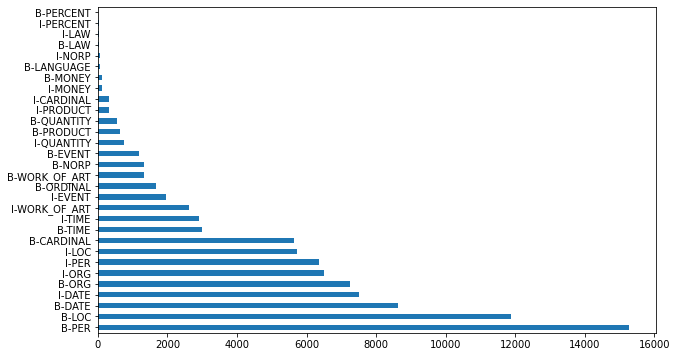

In [12]:
print(final_data_annotate.Tag.value_counts())

print("=" * 80)

plt.figure(figsize = (10, 6))
final_data_annotate[final_data_annotate.Tag != 'O']\
    .Tag\
    .value_counts()\
    .plot\
    .barh();

In [13]:
final_data_annotate.to_csv('data/custom/DATA_ANNOTATED.csv', index=None)